# Hysteresis

To examine the effect of experimental factors on the "Hysteresis"


## Requirements


In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(ggpubr)
    library(rstatix)
    library(dplyr)
    library(lme4)
    library(AICcmodavg)
    library(MuMIn)
    library(emmeans)
    library(patchwork)
}))

options(warn = -1) # turn-off warnings

## Data preparation

In [1]:
library(readxl)
setwd("C:/DataForR")
getwd()
data = read_excel("ProcessedData.xlsx", sheet = "BasicVars")
data

[1] "C:/DataForR"

subject No.,Axis Orientation,orientation No.,Rotation Condition,rotation No.,alpha1: descending transition point [SN],alpha2: ascending transition point [SN],PSE: point of subjective equality [SN],Hysteresis [SN],alpha1: descending transition point [AR],alpha2: ascending transition point [AR],PSE: point of subjective equality [AR],Hysteresis [AR]
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Orthogonal,0,without rotation,0,5.75,6.25,6.000,0.50,0.9181849,0.9575784,0.9378816,0.039393500
1,Orthogonal,0,with 90° rotation,1,8.50,9.00,8.750,0.50,1.1252976,1.1525000,1.1388988,0.027202375
1,Oblique,1,without rotation,0,7.25,7.25,7.250,0.00,1.0144047,1.0155953,1.0150000,0.001190500
1,Oblique,1,with 90° rotation,1,6.50,6.50,6.500,0.00,0.9761905,0.9761905,0.9761905,0.000000000
2,Orthogonal,0,without rotation,0,4.00,4.00,4.000,0.00,0.8057745,0.7996171,0.8026958,-0.006157375
2,Orthogonal,0,with 90° rotation,1,9.75,10.25,10.000,0.50,1.2125000,1.2875000,1.2500000,0.075000000
2,Oblique,1,without rotation,0,7.75,7.75,7.750,0.00,1.0400000,1.0427976,1.0413988,0.002797625
2,Oblique,1,with 90° rotation,1,6.25,6.00,6.125,-0.25,0.9627976,0.9494048,0.9561012,-0.013392875
3,Orthogonal,0,without rotation,0,6.50,6.25,6.375,-0.25,0.9750000,0.9627976,0.9688988,-0.012202375


In [3]:
# create a dataframe based on the required columns of data:
subject = data[,"subject No."]
AxisOrientation = data[,"Axis Orientation"]
orientation = data[,"orientation No."]
RotationCondition = data[,"Rotation Condition"]
rotation = data[,"rotation No."]
Hysteresis = data[,"Hysteresis [SN]"]

mydata = data.frame(subject,AxisOrientation,orientation,RotationCondition,rotation,Hysteresis)
colnames(mydata) = c("subject","AxisOrientation","orientation","RotationCondition","rotation","Hysteresis")

# Convert into factor variables
mydata = mydata %>%
  convert_as_factor(subject,AxisOrientation,RotationCondition)

# set the levels:
mydata$AxisOrientation = factor(mydata$AxisOrientation, levels = c("Orthogonal", "Oblique"))
mydata$RotationCondition = factor(mydata$RotationCondition, levels = c("without rotation", "with 90° rotation"))

mydata

subject,AxisOrientation,orientation,RotationCondition,rotation,Hysteresis
<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>
1,Orthogonal,0,without rotation,0,0.50
1,Orthogonal,0,with 90° rotation,1,0.50
1,Oblique,1,without rotation,0,0.00
1,Oblique,1,with 90° rotation,1,0.00
2,Orthogonal,0,without rotation,0,0.00
2,Orthogonal,0,with 90° rotation,1,0.50
2,Oblique,1,without rotation,0,0.00
2,Oblique,1,with 90° rotation,1,-0.25
3,Orthogonal,0,without rotation,0,-0.25


## summary statistics


In [4]:
mydata %>%
  group_by(AxisOrientation,orientation,RotationCondition,rotation) %>%
  get_summary_stats(Hysteresis, type = "mean_sd")

AxisOrientation,orientation,RotationCondition,rotation,variable,n,mean,sd
<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
Orthogonal,0,without rotation,0,Hysteresis,34,0.868,1.868
Orthogonal,0,with 90° rotation,1,Hysteresis,34,0.750,1.791
Oblique,1,without rotation,0,Hysteresis,34,1.044,1.887
Oblique,1,with 90° rotation,1,Hysteresis,34,0.566,1.718


## Visualization

In [5]:
# calculate mean, standard deviation and standard error:
mydata.summary = mydata %>%
  group_by(AxisOrientation,RotationCondition) %>%
  summarise(
    mean = mean(Hysteresis),
    sd = sd(Hysteresis),
    se = sd(Hysteresis)/sqrt(34)
  )
mydata.summary

`summarise()` has grouped output by 'AxisOrientation'. You can override using
the `.groups` argument.


AxisOrientation,RotationCondition,mean,sd,se
<fct>,<fct>,<dbl>,<dbl>,<dbl>
Orthogonal,without rotation,0.8676471,1.868028,0.3203641
Orthogonal,with 90° rotation,0.7500000,1.790653,0.3070945
Oblique,without rotation,1.0441176,1.887429,0.3236914
Oblique,with 90° rotation,0.5661765,1.717566,0.2945602


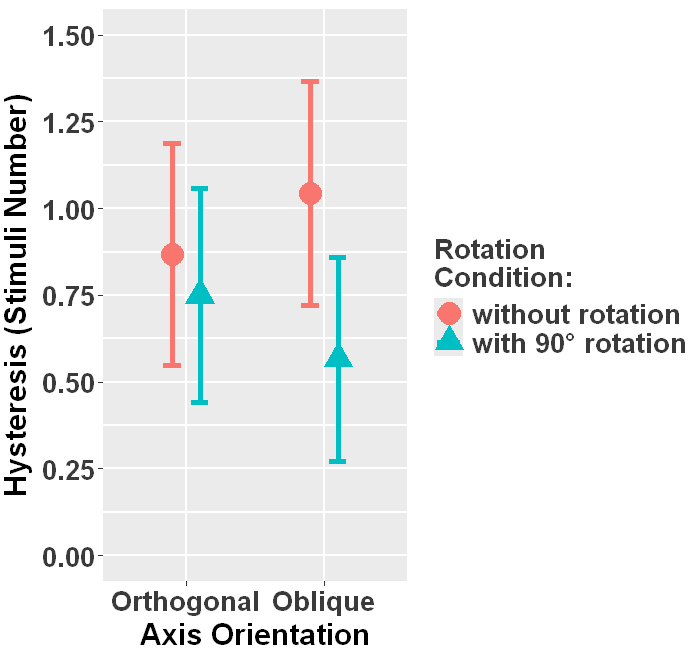

In [6]:
options(repr.plot.height=5.5, repr.plot.width=5.8)

ggplot(data = mydata.summary, aes(x = AxisOrientation, y = mean)) +
    geom_errorbar(
        aes(ymin = mean-se, ymax = mean+se, color = RotationCondition, shape = RotationCondition), width=0.25, size=1.5,
        position = position_dodge(0.4), width = 0.25) +
    geom_point(aes(color = RotationCondition, shape = RotationCondition), position = position_dodge(0.4), size=6) + 
#   scale_shape_manual(values = c(17, 16, 15)) + 
    xlab("Axis Orientation") + ylab("Hysteresis (Stimuli Number)") +
    labs(shape = "Rotation \nCondition: ", color = "Rotation \nCondition: ") + 
    coord_cartesian(ylim = c(0,1.5)) +
    scale_y_continuous(breaks=c(0,0.25,0.5,0.75,1,1.25,1.5,1.75)) +
    theme(axis.title.x = element_text(size = 18, face="bold"),
          axis.title.y = element_text(size = 18, face="bold", vjust=2),
          axis.text.x  = element_text(size = 16, face="bold", color="#3a3a3a"),
          axis.text.y  = element_text(size = 16, face="bold", color="#3a3a3a"),
          legend.title = element_text(size = 16, face="bold", color="#3a3a3a"),
          legend.text  = element_text(size = 16, face="bold", color="#3a3a3a"),
          panel.grid.minor = element_line(colour = "white",size=0.8),
          panel.grid.major = element_line(colour = "white",size=0.8)) 
    
# save plot:
ggsave("plot_Hysteresis_A.jpg", dpi = 300, height = 5.5, width = 5.8)

# Mixed Effects Model

## Model Selection

In [7]:
# define models:
lme.Null                             = lmer(Hysteresis ~ (1 + orientation + rotation | subject), REML = FALSE, data = mydata)
lme.Orientation                      = lmer(Hysteresis ~ orientation + (1 + orientation + rotation | subject), REML = FALSE, data = mydata)
lme.Rotation                         = lmer(Hysteresis ~ rotation + (1 + orientation + rotation | subject), REML = FALSE, data = mydata)
lme.Orientation_Rotation_Additive    = lmer(Hysteresis ~ orientation + rotation + (1 + orientation + rotation | subject), REML = FALSE, data = mydata)
lme.Orientation_Rotation_NonAdditive = lmer(Hysteresis ~ orientation*rotation + (1 + orientation + rotation | subject), REML = FALSE, data = mydata)

# run aictab:
modelsMS = list("null"                   = lme.Null,
                "orientation"            = lme.Orientation,
                "rotation"               = lme.Rotation,
                "orientation + rotation" = lme.Orientation_Rotation_Additive,
                "orientation*rotation"   = lme.Orientation_Rotation_NonAdditive)

output = aictab(cand.set = modelsMS)

# add evidence ratio
output$EvidenceRatio = output$AICcWt[1]/output$AICcWt

# add marginal and conditional R-squared:
for (x in 1:length(output$Modnames)) {
    m = output$Modnames[x]
    tmp = r.squaredGLMM(modelsMS[[m]])
    output$R2m[x] = tmp[1]
    output$R2c[x] = tmp[2]
}

output

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



,Modnames,K,AICc,Delta_AICc,ModelLik,AICcWt,LL,Cum.Wt,EvidenceRatio,R2m,R2c
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,rotation,9,467.0759,0.000000,1.0000000,0.46711848,-223.8237,0.4671185,1.000000,0.0069212649,0.7774269
1,null,8,468.5955,1.519583,0.4677639,0.21850118,-225.7308,0.6856197,2.137830,0.0000000000,0.7665257
4,orientation + rotation,10,469.4069,2.331018,0.3117639,0.14563069,-223.8235,0.8312504,3.207555,0.0069041758,0.7774248
5,orientation*rotation,11,470.2262,3.150283,0.2069782,0.09668336,-223.0486,0.9279337,4.831426,0.0094301875,0.7824457
2,orientation,9,470.8139,3.737993,0.1542784,0.07206628,-225.6927,1.0000000,6.481790,0.0002078405,0.7679478


<div class="alert alert-block alert-success">
<b></b> 
    <font color='darkgreen'> In terms of Delta_AICc (<=4) and/or EvidenceRatio (<=10), all the 
    <font color='red'> 5 models 
    <font color='darkgreen'> are competitive and will be selected for the model averaging
</div>

### model averaging

In [8]:
# determine subset of models:
subset = output$Modnames[output$Delta_AICc <= 4 | output$EvidenceRatio <= 10]
subset

[1] "rotation"               "null"                   "orientation + rotation"
[4] "orientation*rotation"   "orientation"

In [9]:
# model average:
modelAve = model.avg(modelsMS[subset])

modelAve.summary = summary(modelAve)
modelAve.summary


Call:
model.avg(object = modelsMS[subset])

Component model call: 
lmer(formula = Hysteresis ~ <5 unique rhs>, data = mydata, REML = 
     FALSE)

Component models: 
       df  logLik   AICc delta weight
2       9 -223.82 467.08  0.00   0.47
(Null)  8 -225.73 468.60  1.52   0.22
12     10 -223.82 469.41  2.33   0.15
123    11 -223.05 470.23  3.15   0.10
1       9 -225.69 470.81  3.74   0.07

Term codes: 
         orientation             rotation orientation:rotation 
                   1                    2                    3 

Model-averaged coefficients:  
(full average) 
                     Estimate Std. Error Adjusted SE z value Pr(>|z|)   
(Intercept)           0.87700    0.31317     0.31583   2.777  0.00549 **
rotation             -0.19403    0.19031     0.19124   1.015  0.31029   
orientation           0.01280    0.12392     0.12489   0.102  0.91839   
orientation:rotation -0.03483    0.13908     0.13965   0.249  0.80301   
 
(conditional average) 
                     Esti

In [10]:
# confidence intervals:
modelAve.confint = confint(model.avg(modelsMS[subset]), level = 0.95)

# integrate outputs:
cbind(modelAve.summary$coefmat.full, modelAve.confint)

,Estimate,Std. Error,Adjusted SE,z value,Pr(>|z|),2.5 %,97.5 %
(Intercept),0.87699641,0.3131734,0.3158298,2.7768008,0.0054897,0.2579814,1.49601141
rotation,-0.19403108,0.1903142,0.1912352,1.0146201,0.3102870,-0.6119242,0.06492062
orientation,0.01279618,0.1239220,0.1248884,0.1024609,0.9183909,-0.3908293,0.47223500
orientation:rotation,-0.03483445,0.1390815,0.1396459,0.2494484,0.8030140,-0.9298254,0.20923720


<div class="alert alert-block alert-success">
<b></b> 
    <font color='darkgreen'> Significant fixed effects: 
    <font color='red'> intercept
</div>

## Post-hoc

### compare orientation*rotation pairs

In [11]:
# define the model:
lmePH.OrientationRotation = lmer(Hysteresis ~ AxisOrientation*RotationCondition + (1 + orientation + rotation | subject), 
                      REML = FALSE, data = mydata)

# define the estimated marginal means:
emm.OrientationRotation = emmeans(lmePH.OrientationRotation, list(pairwise ~ AxisOrientation*RotationCondition), adjust = "tukey")

# pairwise comparisions:
a = summary(pairs(emm.OrientationRotation))

# confidence intervals:
b = summary(confint(emm.OrientationRotation, level = 0.95))

# integrate the results:
c = cbind(a, b$`pairwise differences of AxisOrientation, RotationCondition`[,c("lower.CL","upper.CL")])
c

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



,contrast,estimate,SE,df,t.ratio,p.value,lower.CL,upper.CL
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Orthogonal without rotation - Oblique without rotation,-0.1764706,0.2349717,66.61781,-0.7510290,0.8759095,-0.79564088,0.4426997
2,Orthogonal without rotation - Orthogonal with 90° rotation,0.1176471,0.2110609,69.93520,0.5574081,0.9442227,-0.43784311,0.6731372
3,Orthogonal without rotation - Oblique with 90° rotation,0.3014706,0.2226749,35.03030,1.3538600,0.5359036,-0.29903637,0.9019775
4,Oblique without rotation - Orthogonal with 90° rotation,0.2941176,0.2541891,35.03030,1.1570823,0.6572842,-0.39137640,0.9796117
5,Oblique without rotation - Oblique with 90° rotation,0.4779412,0.2110609,69.93520,2.2644706,0.1164045,-0.07754899,1.0334313
6,Orthogonal with 90° rotation - Oblique with 90° rotation,0.1838235,0.2349717,66.61781,0.7823219,0.8622093,-0.43534676,0.8029938


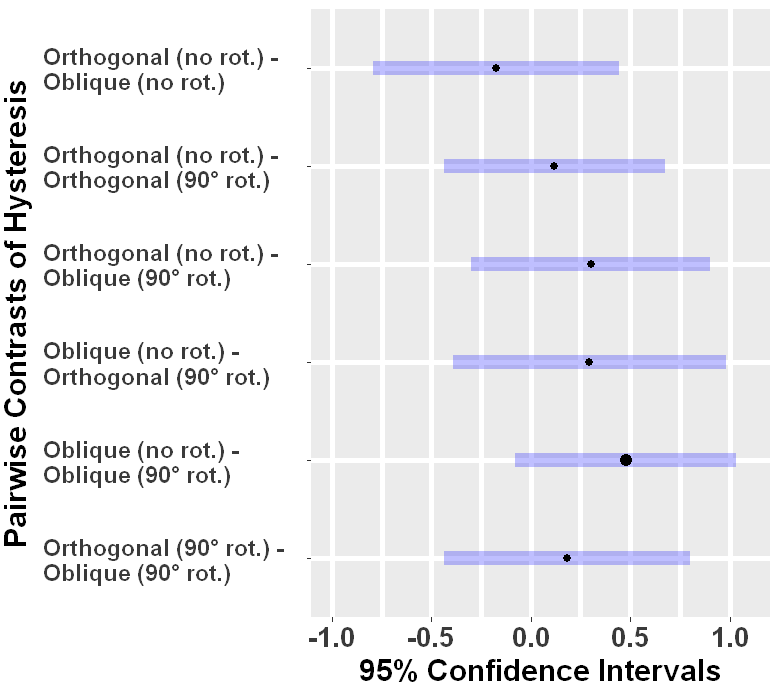

In [20]:
# draw the confidence intervals of contrasts:
options(repr.plot.height=5.8, repr.plot.width=6.5)
p = plot(pairs(emm.OrientationRotation, comparisons = TRUE))

# set the confidence intervals:
p$data$lcl = c$lower.CL
p$data$ucl = c$upper.CL

# set point sizes:
tmp = summary(pairs(emm.OrientationRotation))
point_size = pmax(pmin(log(1/tmp$p.value,2),10),1)

# set point colors:
point_color = rep("black", length(point_size))
point_color[(p$data$lcl>0 & p$data$ucl>0) | (p$data$lcl<0 & p$data$ucl<0)] = "red"

# set plot properties:
plot.OrientationRotation = p + 
    geom_point(size = point_size, color = point_color) + 
    xlab("95% Confidence Intervals") + ylab("Pairwise Contrasts of Hysteresis") + 
#     scale_y_discrete(limits = rev) + 
    theme(axis.title.x = element_text(size = 18, face="bold"),
          axis.title.y = element_text(size = 18, face="bold", vjust = 2),
          axis.text.x  = element_text(size = 16, face="bold", color="#3a3a3a"),
          axis.text.y  = element_text(size = 14, face="bold", color="#3a3a3a", hjust = 0),
          legend.title = element_text(size = 16, face="bold", color="#3a3a3a"),
          legend.text  = element_text(size = 16, face="bold", color="#3a3a3a"),
          panel.grid.minor = element_line(colour = "white",size=1.5),
          panel.grid.major = element_line(colour = "white",size=1.5)) + 
    scale_y_discrete(limits = rev, 
                     labels = c("Orthogonal (90° rot.) - \nOblique (90° rot.)",
                                "Oblique (no rot.) - \nOblique (90° rot.)",
                                "Oblique (no rot.) - \nOrthogonal (90° rot.)",
                                "Orthogonal (no rot.) - \nOblique (90° rot.)",
                                "Orthogonal (no rot.) - \nOrthogonal (90° rot.)",
                                "Orthogonal (no rot.) - \nOblique (no rot.)")) + 
    coord_cartesian(xlim = c(-1,1.1))


plot.OrientationRotation

# save plot:
ggsave("plot_Hysteresis_B.jpg", dpi = 300, height = 5.8, width = 6.5)